In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/question4-dataset/question4-stock-data.csv


In [3]:
df= pd.read_csv("/kaggle/input/question4-dataset/question4-stock-data.csv")
df.head()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0      int64
Date           object
Adj Close     float64
Close         float64
High          float64
Low           float64
Open          float64
Volume        float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
test = pd.DataFrame(df['Close'])  # Creating a new DataFrame with 'Close' column
df = df.drop(columns=['Close'])   # Dropping 'Close' from the original df


In [8]:
dis = pd.DataFrame({
    "NaN count":df.isnull().sum(),
    # "Missing Percentage": train.isnull().sum() / train.id.count() * 100,
    "Unique Count": df.nunique()
})
dis

,NaN count,Unique Count
Unnamed: 0,0,11291
Date,110,11181
Adj Close,93,7449
High,95,5669
Low,127,5644
Open,103,4769
Volume,145,5718


In [9]:
dis = pd.DataFrame({
    "NaN count":test.isnull().sum(),
    # "Missing Percentage": train.isnull().sum() / train.id.count() * 100,
    "Unique Count": test.nunique()
})
dis

,NaN count,Unique Count
Close,117,5813


# Data cleaning

## Handle null values in dates by intepolating

In [10]:
null_indexes = df[df['Date'].isna()].index

# Select a different null occurrence (e.g., the second one)
if len(null_indexes) > 1:
    selected_null_index = null_indexes[1]  # Change this index to see another missing value
else:
    selected_null_index = null_indexes[0]  # If only one null value, use that one

# Display surrounding values for the selected null
df.iloc[max(selected_null_index - 1, 0): min(selected_null_index + 2, len(df))]

,Unnamed: 0,Date,Adj Close,High,Low,Open,Volume
151,151,1980-10-20,3.215517,4.635814,4.607718,0.0,1780.0
152,152,NaT,3.195910,4.607718,4.579622,0.0,8898.0
153,153,1980-10-22,3.215517,4.635814,4.607718,0.0,4449.0


In [11]:
df['Date'] = df['Date'].astype('datetime64[ns]')  # Ensure correct type
df['Date'] = df['Date'].fillna(method='ffill') + pd.to_timedelta(1, unit='D')


<ipython-input-11-9a3112a103f4>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill') + pd.to_timedelta(1, unit='D')


In [12]:
df['Date']

0       1980-03-18
1       1980-03-19
2       1980-03-20
3       1980-03-21
4       1980-03-22
           ...    
11286   2024-12-21
11287   2024-12-24
11288   2024-12-25
11289   2024-12-27
11290   2024-12-28
Name: Date, Length: 11291, dtype: datetime64[ns]

In [13]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year   # Extracts the year
df['Day'] = df['Date'].dt.day     # Extracts the day of the month


## Interpolate Adj Close

In [14]:
null_indexes = df[df['Adj Close'].isna()].index

# Select a different null occurrence (e.g., the second one)
if len(null_indexes) > 1:
    selected_null_index = null_indexes[3]  # Change this index to see another missing value
else:
    selected_null_index = null_indexes[0]  # If only one null value, use that one

# Display surrounding values for the selected null
df.iloc[max(selected_null_index - 1, 0): min(selected_null_index + 2, len(df))]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,Date,Adj Close,High,Low,Open,Volume,Month,Year,Day
497,497,1982-03-06,3.34296,4.836699,4.790341,0.0,2427.0,3,1982,6
498,498,1982-03-09,NaN,4.944868,4.913963,0.0,3236.0,3,1982,9
499,499,1982-03-10,3.34296,4.821247,4.790341,0.0,16178.0,3,1982,10


In [15]:
df['Adj Close'] = df['Adj Close'].interpolate(method='linear')

## Interpolate High

In [16]:
null_indexes = df[df['High'].isna()].index

# Select a different null occurrence (e.g., the second one)
if len(null_indexes) > 1:
    selected_null_index = null_indexes[2]  # Change this index to see another missing value
else:
    selected_null_index = null_indexes[0]  # If only one null value, use that one

# Display surrounding values for the selected null
df.iloc[max(selected_null_index - 1, 0): min(selected_null_index + 2, len(df))]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,Date,Adj Close,High,Low,Open,Volume,Month,Year,Day
172,172,1980-11-20,2.735150,3.961514,3.919370,0.0,5339.0,11,1980,20
173,173,1980-11-21,2.764560,NaN,3.961514,0.0,5339.0,11,1980,21
174,174,1980-11-22,2.744953,3.961514,3.933418,0.0,890.0,11,1980,22


In [17]:
df['High'] = df['High'].interpolate(method='linear')

In [18]:
null_indexes = df[df['Low'].isna()].index

# Select a different null occurrence (e.g., the second one)
if len(null_indexes) > 1:
    selected_null_index = null_indexes[3]  # Change this index to see another missing value
else:
    selected_null_index = null_indexes[0]  # If only one null value, use that one

# Display surrounding values for the selected null
df.iloc[max(selected_null_index - 1, 0): min(selected_null_index + 2, len(df))]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,Date,Adj Close,High,Low,Open,Volume,Month,Year,Day
127,127,1980-09-17,2.921415,4.228424,4.186281,0.0,5339.0,9,1980,17
128,128,1980-09-18,2.921415,4.214376,NaN,0.0,1780.0,9,1980,18
129,129,1980-09-19,2.901808,4.172233,4.158185,0.0,1780.0,9,1980,19


In [19]:
df['Low'] = df['Low'].interpolate(method='linear')

In [20]:
count_zeros = (df['Open'] == 0).sum()
count_zeros

2948

In [21]:
df['Open'].fillna(0, inplace=True)


<ipython-input-21-1cd610350b85>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Open'].fillna(0, inplace=True)


In [22]:
test

,Close
0,3.291227
1,3.304606
2,3.304606
3,3.304606
4,3.384880
...,...
11286,178.169998
11287,180.449997
11288,181.429993
11289,197.360001


In [23]:
df['Volume'].fillna(df['Volume'].mean(), inplace=True)


<ipython-input-23-f52fbf62aae0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Volume'].fillna(df['Volume'].mean(), inplace=True)


In [24]:
null_indexes = test[test['Close'].isna()].index

# Select a different null occurrence (e.g., the second one)
if len(null_indexes) > 1:
    selected_null_index = null_indexes[100]  # Change this index to see another missing value
else:
    selected_null_index = null_indexes[0]  # If only one null value, use that one

# Display surrounding values for the selected null
test.iloc[max(selected_null_index - 1, 0): min(selected_null_index + 2, len(test))]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Close
9989,138.279999
9990,NaN
9991,138.679993


In [25]:
test['Close'] = test['Close'].interpolate(method='linear')

In [26]:
df = df.drop(columns='Date')


# EDA

## Analyse distribution of data

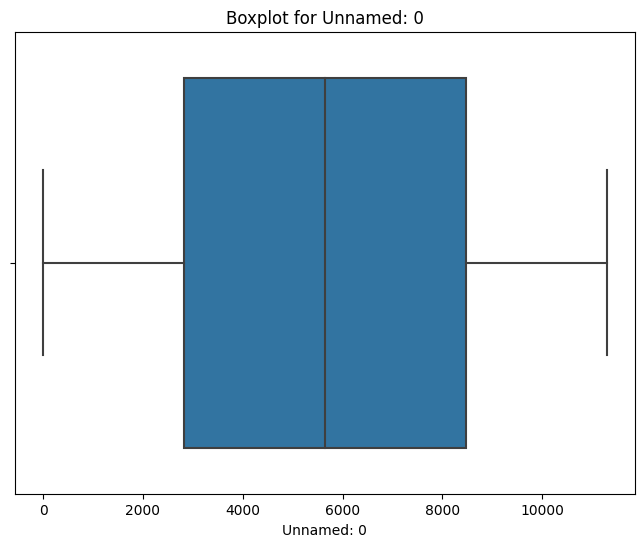

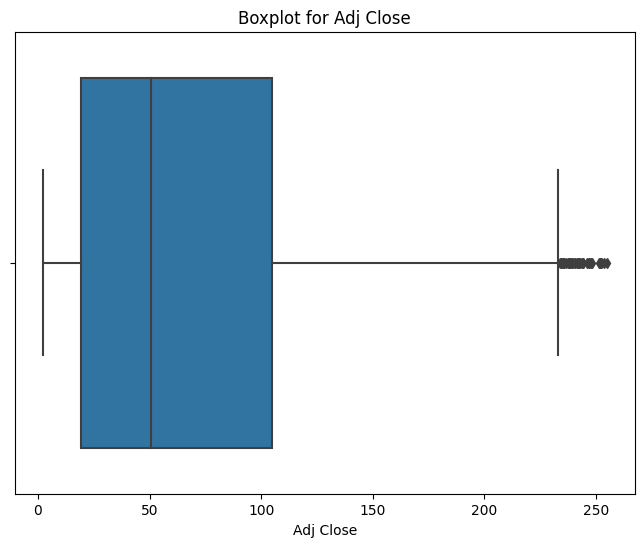

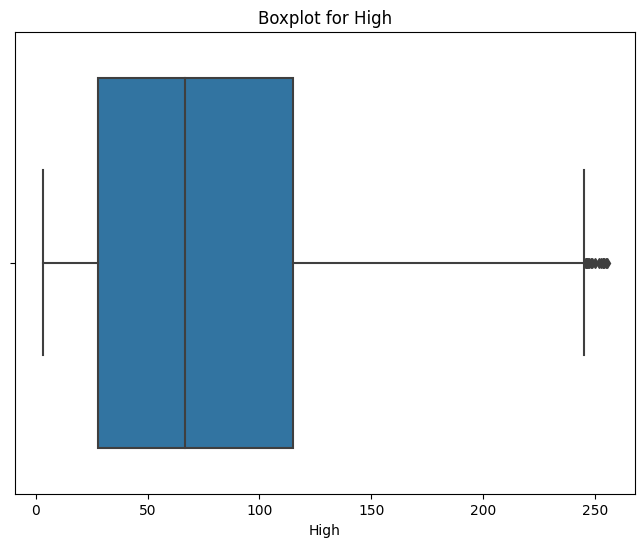

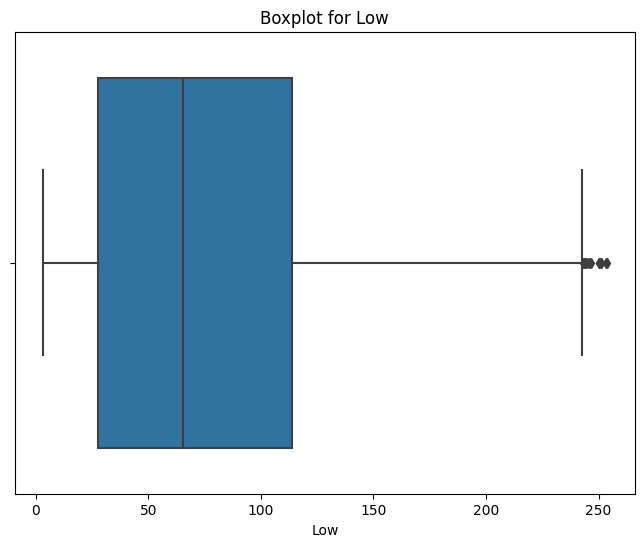

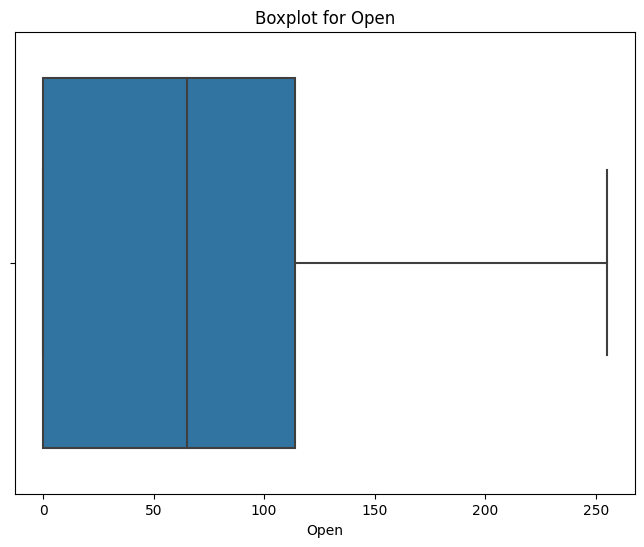

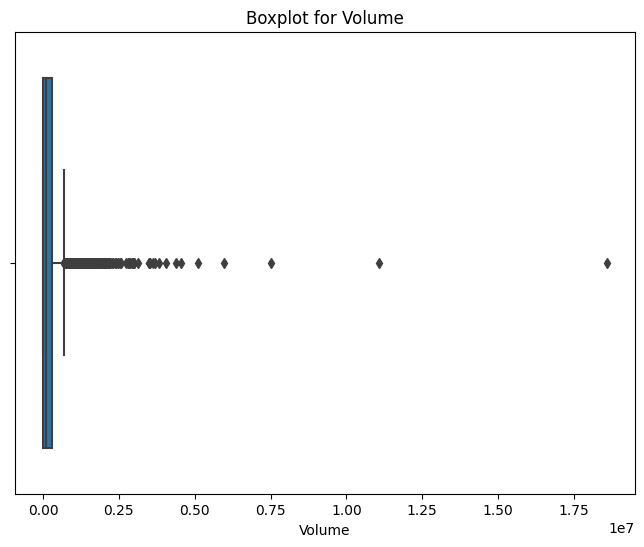

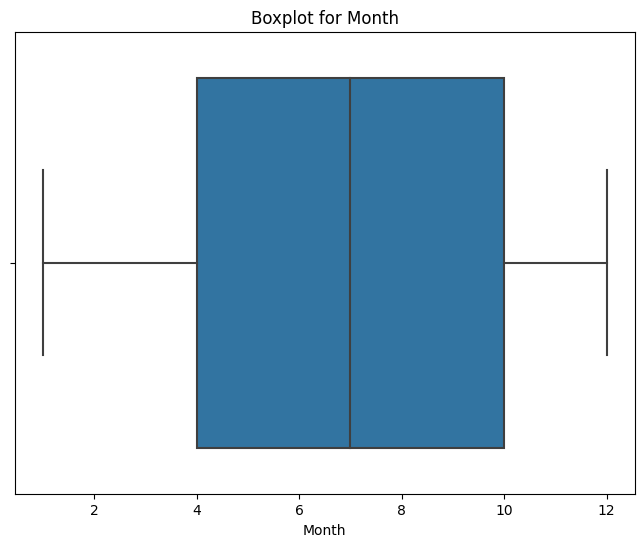

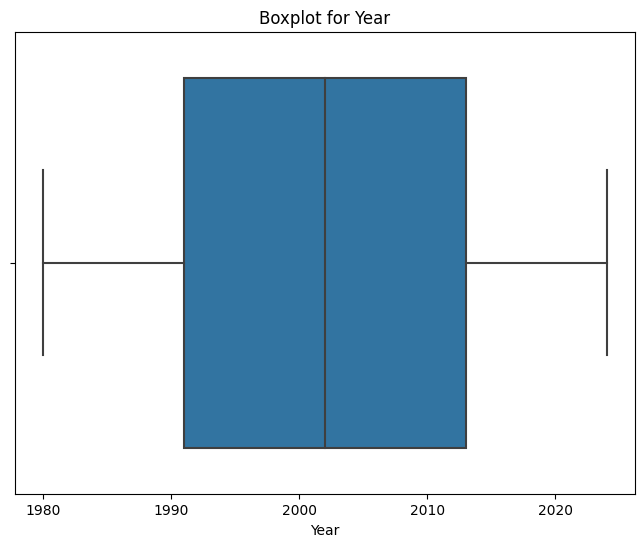

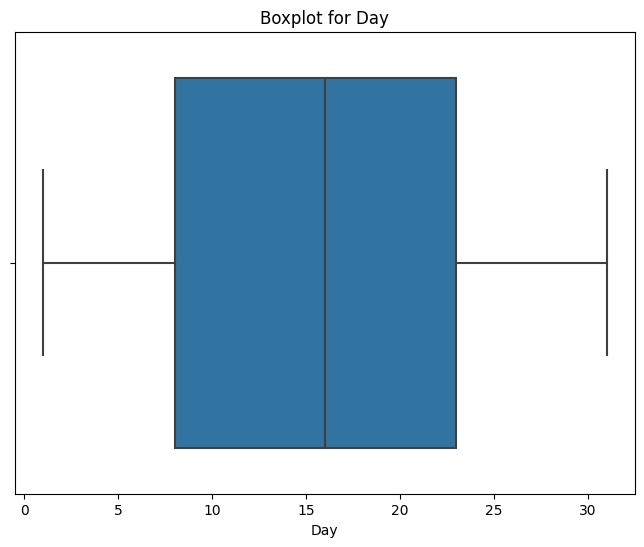

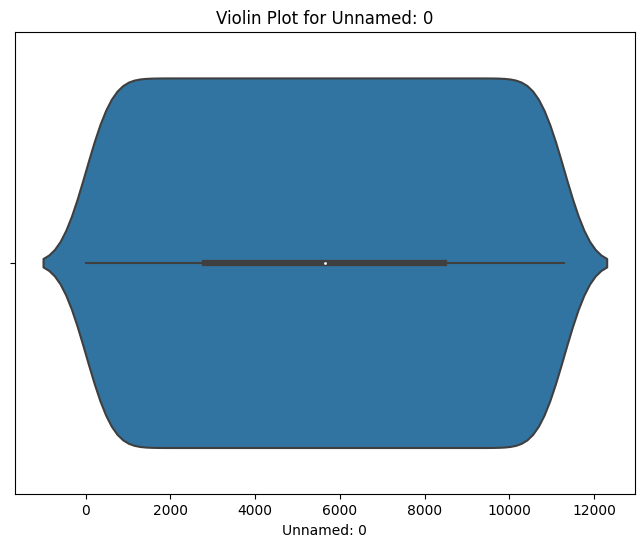

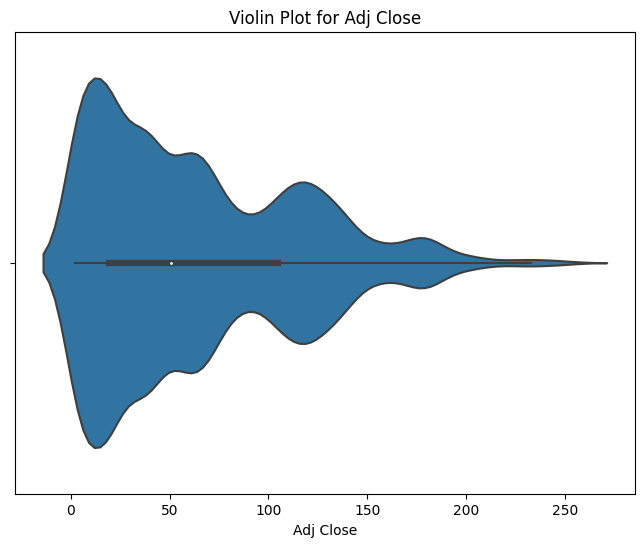

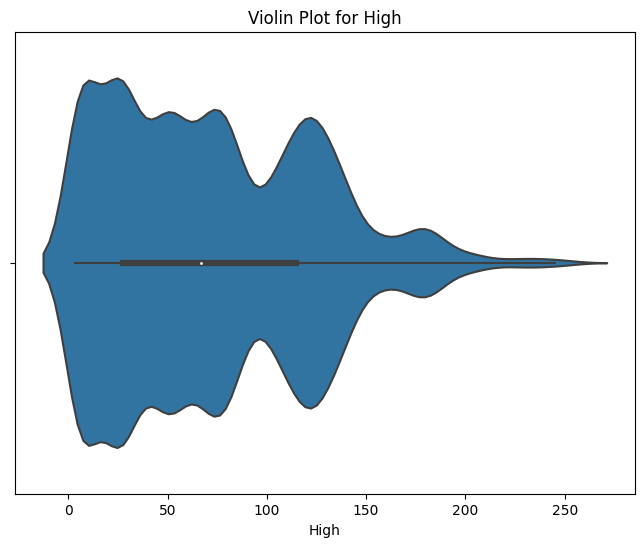

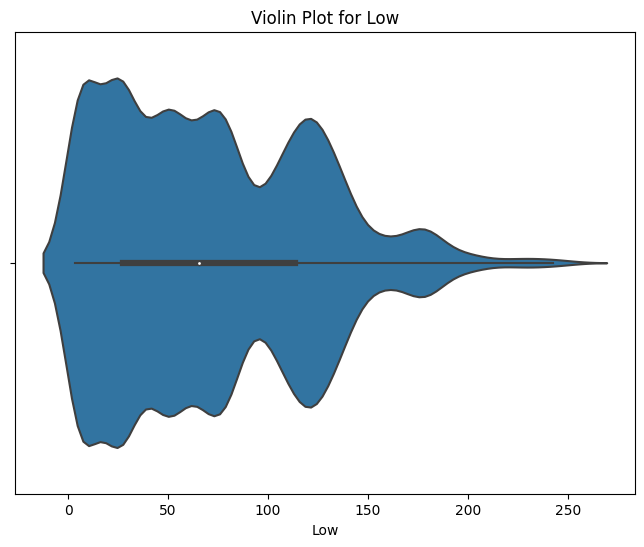

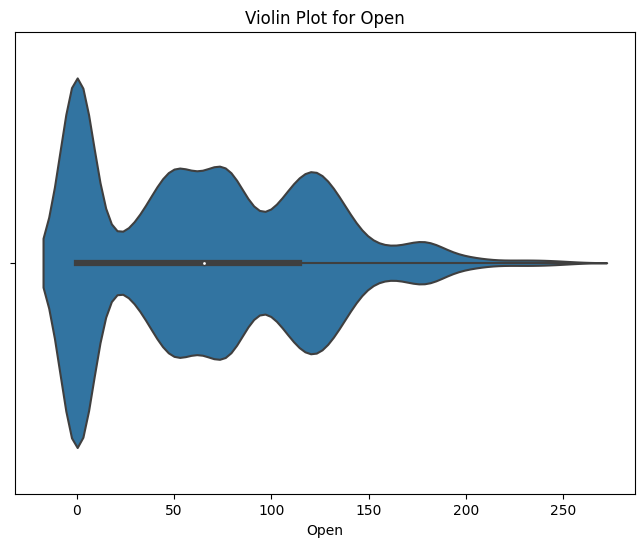

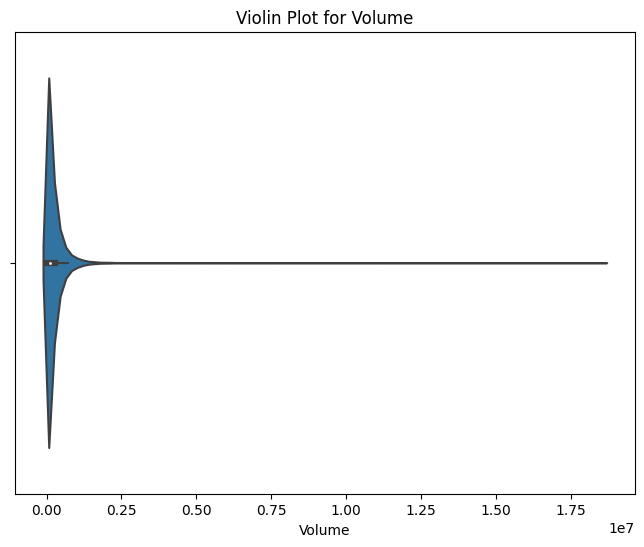

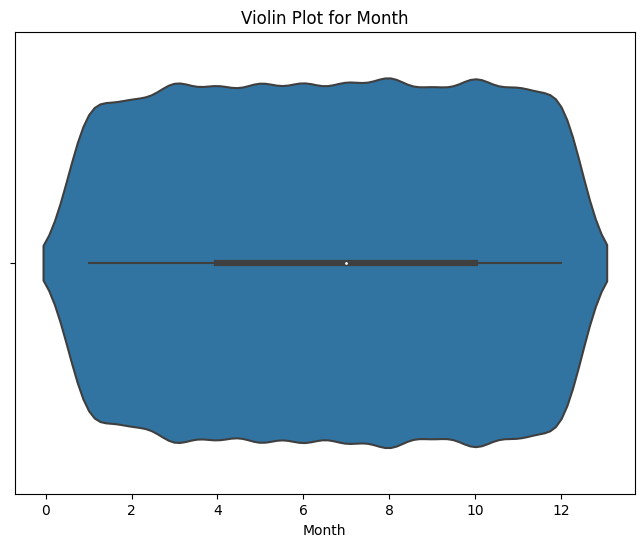

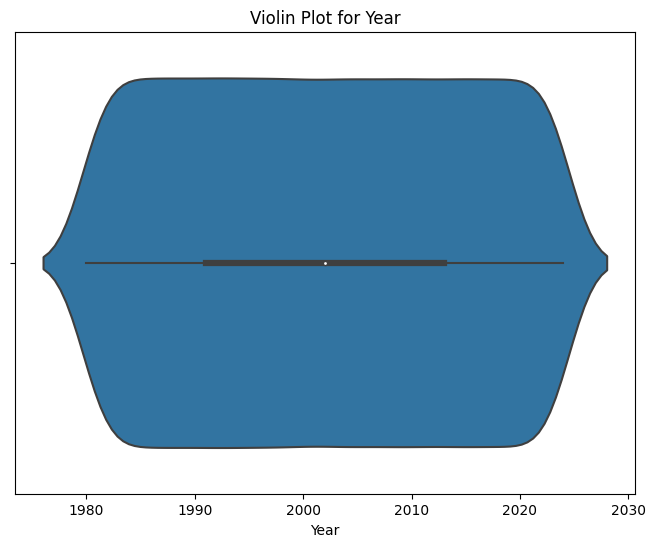

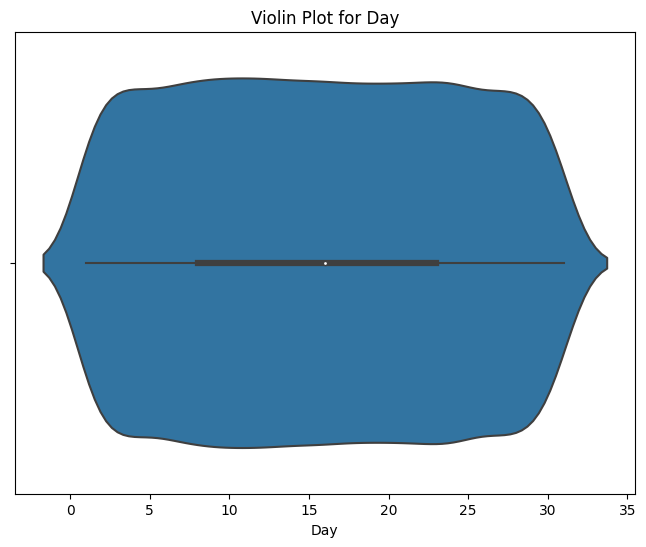

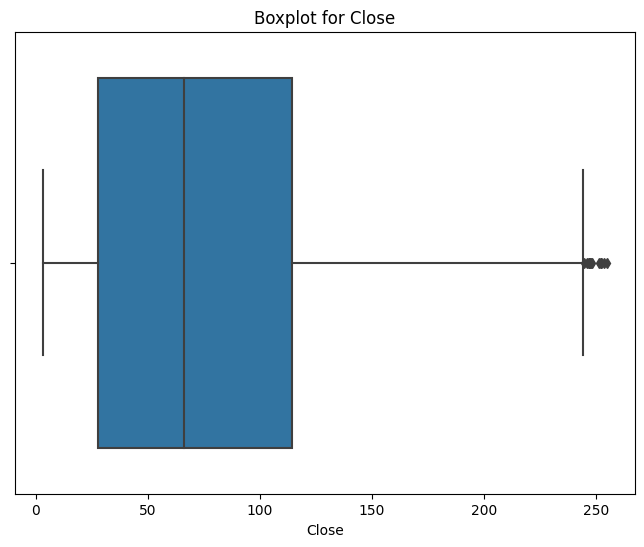

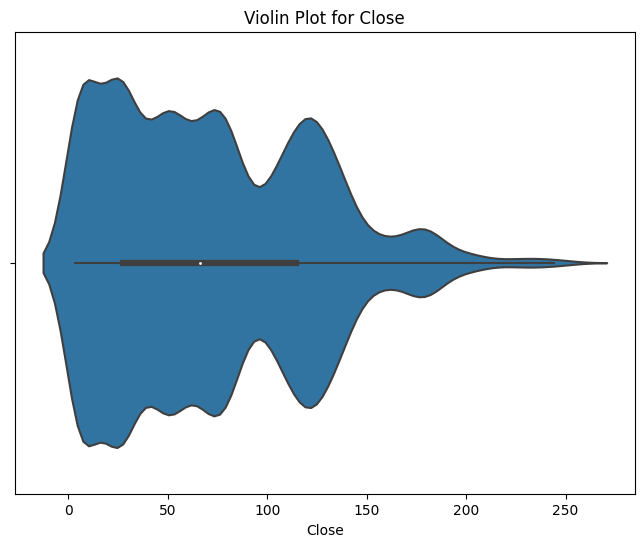

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for each column separately
def plot_boxplots_separately(df):
    for column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

# Violin plot for each column separately
def plot_violinplots_separately(df):
    for column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=df[column])
        plt.title(f'Violin Plot for {column}')
        plt.show()

# Assuming `df` is your DataFrame containing the dataset
plot_boxplots_separately(df)
plot_violinplots_separately(df)
plot_boxplots_separately(test)
plot_violinplots_separately(test)


In [28]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Step 1: Select numeric columns (excluding non-numeric like 'Date')
# numeric_cols = df.select_dtypes(include=['number']).columns
# df_numeric = df[numeric_cols]

# # Step 2: Standardize the data
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_numeric)

# # Step 3: Apply PCA to reduce to 2 components
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(df_scaled)

# # Step 4: Create a DataFrame for PCA results
# pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

# # Step 5: Add the PCA columns back to the original DataFrame
# df = df.reset_index(drop=True)
# df = pd.concat([df, pca_df], axis=1)

# # Display the updated DataFrame
# print(df.head())


In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the df (excluding target variable if needed)
df_scaled = scaler.fit_transform(df)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Display the first few rows
print(df_scaled.head())


   Unnamed: 0  Adj Close      High       Low      Open    Volume     Month  \
0   -1.731897  -1.172539 -1.341081 -1.340930 -1.204240 -0.449159 -1.039395   
1   -1.731591  -1.172360 -1.340821 -1.340667 -1.204240 -0.531487 -1.039395   
2   -1.731284  -1.172360 -1.341860 -1.340667 -1.145178 -0.555701 -1.039395   
3   -1.730977  -1.172360 -1.340821 -1.340667 -1.204240 -0.529066 -1.039395   
4   -1.730670  -1.171289 -1.339264 -1.339093 -1.204240 -0.533908 -1.039395   

       Year       Day  
0 -1.706916  0.260413  
1 -1.706916  0.374743  
2 -1.706916  0.489072  
3 -1.706916  0.603402  
4 -1.706916  0.717731  


In [30]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Assuming 'df' is your training DataFrame and 'test' is your testing DataFrame
# Ensure both DataFrames are aligned (e.g., same date range)
# 'Close' column is in the 'test' DataFrame and other features are in 'df'

# Get the columns of df that you want to calculate MI scores for
X = df_scaled  # features in df
y = test['Close']  # target column 'Close' in test DataFrame

# Calculate mutual information scores
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame with the MI scores for each feature
mi_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Score'])

# Sort MI scores in descending order for better visualization
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display the MI scores
print(mi_df)


            MI Score
Adj Close   5.721617
Low         5.501624
High        5.205786
Open        3.503476
Unnamed: 0  3.478866
Year        2.463496
Volume      0.661221
Month       0.402152
Day         0.000000


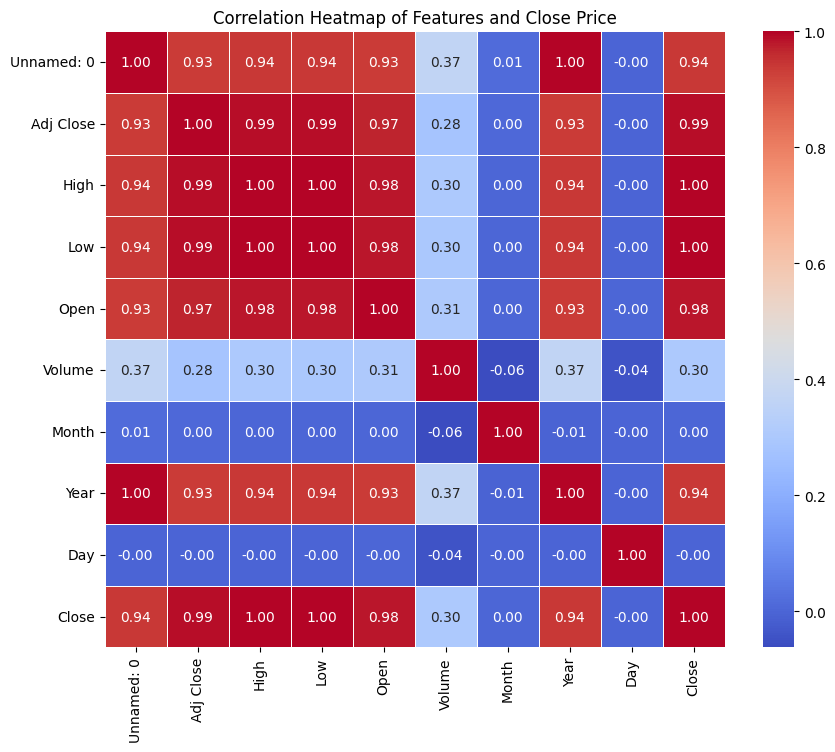

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine df and test['Close'] into a single DataFrame
df_with_close = df.copy()
df_with_close['Close'] = test['Close']

# Compute correlation matrix
corr_matrix = df_with_close.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set title
plt.title("Correlation Heatmap of Features and Close Price")

# Show the plot
plt.show()


In [32]:
df = df.drop('Day', axis=1)

# Model training

In [33]:
from sklearn.model_selection import train_test_split

X = df_scaled  # Features (independent variables)
y = test  # Target (dependent variable)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"RMSE: {rmse:.2f}")


In [35]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
evaluate_model(lmodel, X_train, X_test, y_train, y_test)

RMSE: 0.41


In [36]:
from sklearn.ensemble import RandomForestRegressor
rmodel = RandomForestRegressor(n_estimators=500, random_state=42)
evaluate_model(rmodel, X_train, X_test, y_train, y_test)

<ipython-input-34-2e3d64ce7c9b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RMSE: 0.39


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=500, random_state=42)

# Evaluate the model using your evaluation function
evaluate_model(gbr_model, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.50


In [38]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=500, random_state=42)
}

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and store results
best_model = None
best_rmse = float("inf")

# Store the best model instance
best_model_instance = None

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')  # Use X_train, y_train
    rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
    mean_rmse = rmse_scores.mean()
    
    print(f"{name} - Mean RMSE: {mean_rmse:.4f}, Std Dev: {rmse_scores.std():.4f}")
    
    # Track the best model instance
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_model = name
        best_model_instance = model  # Store actual model instance

print(f"\nBest Model: {best_model} with RMSE: {best_rmse:.4f}")




Linear Regression - Mean RMSE: 0.3983, Std Dev: 0.0132


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Gradient Boosting - Mean RMSE: 0.5144, Std Dev: 0.0242


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Random Forest - Mean RMSE: 0.3861, Std Dev: 0.0460

Best Model: Random Forest with RMSE: 0.3861


In [39]:
# ✅ Train the best model on the full training set
best_model_instance.fit(X_train, y_train)

# ✅ Make predictions on the test set
predictions = best_model_instance.predict(X_test)

<ipython-input-39-4292ca1aabdf>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model_instance.fit(X_train, y_train)
